
# Exercises (Part of the 'Leistungsnachweis')

## Introduction

The aim of this exercise is to analyze a big corpus German or another language, which is not English. If you want to choose another language, it must have Latin characters. Send an e-mail to the professor with the language and the corpus URL.

Start with the creation of a Jupyter Notebook (JNB, ipynb file) for your answers to the following questions. Graphics shall also be included. Export the JNB as a PDF and upload it in iLearn. If you have problems with the JNB, you may alternatively write the answers in a text processor and produce a PDF.

The first chapter of the PDF must contain:

- The group members (same as in previous parts of the 'Leistungsnachweis')
- The chosen language
- Name and description of the corpus with a link (URL) for download.
- The solutions to the tasks described in the next section.

## Task List

1) Install the needed packages NLTK, matplotlib, wordcloud. Choose the language you want to analyze. Check whether NLTK supports this language.

2) Install other language packages of NLTK and corpora if necessary.

3) Choose a large corpus (at least 1M, better 10 MB, e.g. Wikipedia, Twitter, see slides spr-04-corpus-words.pdf) that is available in the chosen language. Load it in NLTK and use it for the following exercises. Please inform the lecturer about the chosen corpus via e-mail.

Important: Depending on the corpus, you often have to do a preprocessing step before you continue doing the following tasks. Preprocessing may include case-folding, removing line-numbers or other characters, etc.

4) Calculate the lexical richness of the selected corpus.

5) Plot the character distribution of your selected corpus.

6) Plot the word distribution of the 20 most often used words of your selected corpus (with stopwords).

7) Plot the dispersion plot of the 5 most often used words.

8) Find the longest word in the text. Select an algorithm for splitting words (also called word break / split algorithm) and split the word into subwords.

9) Find a short sentence with 5 words (plus/minus 1). Create a context-free grammar for the sentence. The grammar shall show the syntactical structure of the sentence, so the terminal symbols shall be words.

10) Select a suitable stemmer and stem every word in the sentence found with part 9.

11) Find a lemmatizer for the language and lemmatize every word in the sentence.

12) Remove stopwords and repeat exercises 6+7 (word distribution and dispersion plot).

13) Print a wordcloud without your stopwords.



# Leistungsnachweis

- By: Alexander Rudaev (22303397)
- Language: German (Previously Russian)
- Corpus: Corpus: deu_news_2024_100K (Leipzig Corpora, ≈ 11 MB plain text  
  Download URL: https://corpora.uni-leipzig.de/en?corpusId=deu_news_2024

In [1]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [2]:
# Task-1: I chose to go with german, as I cannot use russian and english
!pip install -q --upgrade nltk matplotlib wordcloud spacy
!python -m spacy download de_core_news_sm

import nltk
for res in ("punkt", "stopwords", "snowball_data"):
    nltk.download(res, quiet=True)

LANG = "German"
supported = LANG.lower() in nltk.corpus.stopwords.fileids()
print(f"Language: {LANG}  |  NLTK stop-word support: {supported}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 24.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 84.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Language: German  |  NLTK stop-word support: True


In [3]:
# Task 2: Lets try getting the stem and lemma from the word car
from nltk.stem.snowball import SnowballStemmer
import spacy

stemmer = SnowballStemmer("german")
nlp = spacy.load("de_core_news_sm")

word = "Autos" # 'cars' / 'of the car'
print("Snowball stem :", stemmer.stem(word))
print("spaCy lemma:", nlp(word)[0].lemma_)

Snowball stem : autos
spaCy lemma: Auto


In [4]:
# Task-3a: Leipzig Corpora Sammlung – German news 2024, 100k sentences

!wget -q https://downloads.wortschatz-leipzig.de/corpora/deu_news_2024_100K.tar.gz
!tar -xf deu_news_2024_100K.tar.gz deu_news_2024_100K/deu_news_2024_100K-sentences.txt
!cut -f2 deu_news_2024_100K/deu_news_2024_100K-sentences.txt > deu_news_2024.txt
!du -h deu_news_2024.txt # ~11MB

11M	deu_news_2024.txt


In [5]:
# Task-3b: Seems to work, lets check the file
from nltk.corpus import PlaintextCorpusReader

reader = PlaintextCorpusReader(
    root='.',
    fileids='deu_news_2024.txt',
    encoding='utf-8'
)

print("Sentences :", len(reader.sents()))
print("Tokens    :", len(reader.words()))
print("Example   :", " ".join(reader.sents()[0][:20]), "…")


Sentences : 100808
Tokens    : 1832953
Example   : $ DOGEVERSE zeichnet sich nicht nur durch hohe Staking - Renditen aus , sondern auch durch den Start auf mehreren …


In [6]:
# Task-4: Lexical richness? From slides spr-05?
# The lexical richness of a text is the ratio between different words and all words.

from nltk.corpus import stopwords
stops = set(stopwords.words("german"))

# Lower-case everything that comes from the corpus
lowered = [w.lower() for w in reader.words()]
# Keep only alphabetic tokens and drop stop-words (or should I not drop them)
filtered = [w for w in lowered if w.isalpha() and w not in stops]

def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

words = filtered
ttr = lexical_diversity(words)
print(f"Lexical richness (TTR): {ttr:.4f}")

count_war = words.count('krieg')
print(f"'krieg' occurs in {percentage(count_war, len(words)):.2f}% of the tokens")

Lexical richness (TTR): 0.1526
'krieg' occurs in 0.03% of the tokens


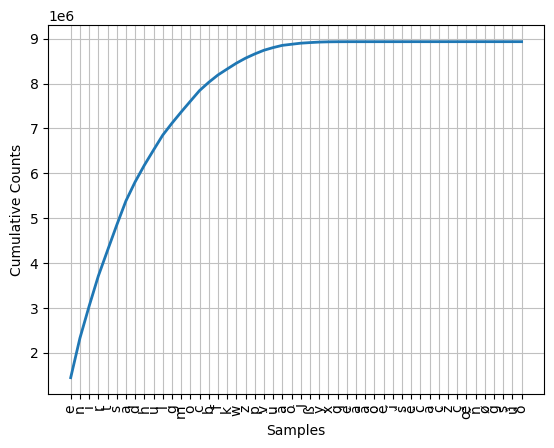

In [7]:
# Task-5: Plot the character distribution of my corpus. Sure

from nltk import FreqDist
import matplotlib.pyplot as plt

only_ch = [ch.lower() for ch in reader.raw() if ch.isalpha()]

fdist = FreqDist(only_ch)
plot = fdist.plot(50, cumulative=True)

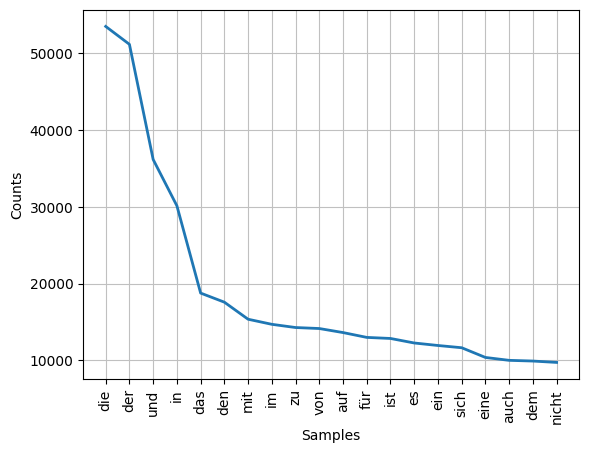

In [8]:
# Task-6: Plot the word distribution of the 20 most often used words. Ofc

from nltk import FreqDist

only_words = [w.lower() for w in reader.words() if w.isalpha()]

fdist_words = FreqDist(only_words)
plot = fdist_words.plot(20)

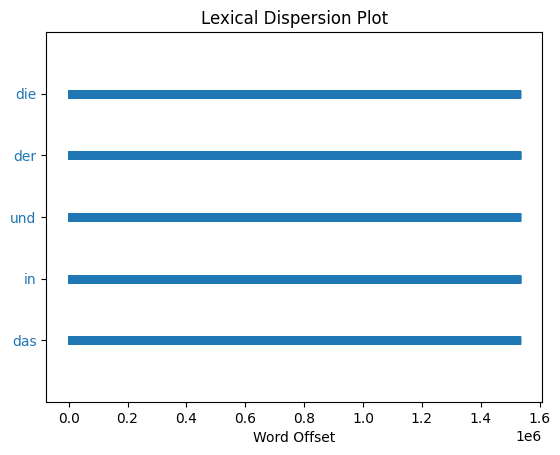

In [9]:
# Task-7: Plot the dispersion plot of the 5 most often used words. Lets take
# fdist_words and only_words from Task-6

from nltk import FreqDist
from nltk.text import Text

top5_words  = [w for w, _ in fdist_words.most_common(5)]
text = Text(only_words)
text.dispersion_plot(top5_words)

# The top five tokens are ultra-common function words, so their “stripes” merge into solid bars.

In [10]:
# Task-8: Find the longest word in the text and split it into subwords using a greedy max-match algorithm

# A clean, lowercase word list (alphabetic only)
only_words   = [w.lower() for w in reader.words() if w.isalpha()]
# Longest word
longest_word = max(only_words, key=len)
print(f"Longest word: {longest_word!r} (length {len(longest_word)})")

vocab = set(only_words)

# Greedy "max-match" splitter
def split_greedy(word, vocab):
    parts = []
    i = 0
    n = len(word)
    while i < n:
        # try the longest possible segment first
        for j in range(n, i, -1):
            segment = word[i:j]
            if segment in vocab:
                parts.append(segment)
                i = j
                break
        else:
            # no match -> fall back to single character
            parts.append(word[i])
            i += 1
    return parts

# Split and display
subwords = split_greedy(longest_word, vocab)
print("Subwords:", subwords)


Longest word: 'krankenhausversorgungsverbesserungsgesetz' (length 41)
Subwords: ['krankenhausversorgungsverbesserungsgesetz']


In [11]:
# Task-8b: Due to difficulties in accurately splitting German words using standard algorithms,
# it's more effective to use an external tool like Morfessor or pymorphy3/spacy.
# However, MorphAnalyzer failed to process this particular word correctly,
# so Morfessor is the preferred solution here. (This happened with both German and Russian)

!pip install -q morfessor

# Build training data from the clean word list
from collections import Counter
word_counts = Counter(only_words)
train_data  = [(count, word) for word, count in word_counts.items()]

# Train Morfessor model
from morfessor import BaselineModel
model = BaselineModel()
model.load_data(train_data)
model.train_batch()

# 4️⃣ Segment the longest word
longest = max(only_words, key=len)
subwords, _ = model.viterbi_segment(longest_word)

print(f"Longest word: {longest!r} (length {len(longest)})")
print("Morfessor segmentation:", subwords)


100% (131396 of 131396) |################| Elapsed Time: 0:01:23 Time:  0:01:23
100% (131396 of 131396) |################| Elapsed Time: 0:01:17 Time:  0:01:17
100% (131396 of 131396) |################| Elapsed Time: 0:01:17 Time:  0:01:17


Longest word: 'krankenhausversorgungsverbesserungsgesetz' (length 41)
Morfessor segmentation: ['krankenhaus', 'versorgungs', 'verbesserung', 'sgesetz']


In [12]:
# Task-9: Pick one 4-word sentence and build a tiny CFG for it

import spacy
from nltk.grammar import CFG
from nltk.parse   import ChartParser
from nltk.tree    import TreePrettyPrinter

nlp = spacy.load("de_core_news_sm")

# The first 4-word sentence we meet
for s in reader.sents():
    toks = [w.lower() for w in s if w.isalpha()]
    if len(toks) == 4:
        sent = toks
        break

print("Selected sentence :", " ".join(sent))

# Coarse POS tags -> grammar symbols (e.g. PRON, VERB, DET ...)
doc       = nlp(" ".join(sent))
pos_tags  = [tok.pos_.upper() for tok in doc]

# Build a CFG: S -> POS1 POS2 POS3 POS4 + POS_i -> 'word'
rules  = [f"S -> {' '.join(pos_tags)}"]
rules += [f"{tag} -> '{word}'" for tag, word in zip(pos_tags, sent)]

grammar_src = "\n".join(rules)
grammar     = CFG.fromstring(grammar_src)
print("\nGrammar:\n", grammar)

# Parse and show pretty tree
parser = ChartParser(grammar)
tree   = next(parser.parse(sent))

print("\nParse tree:\n")
print(tree)
print("\nTreebank:\n")
print(TreePrettyPrinter(tree))

# Sadly I couldn't use treebank, because it only supports english. So I had to
# use Coarse POS tags to build the CFG.


Selected sentence : aber auch darüber hinaus

Grammar:
 Grammar with 5 productions (start state = S)
    S -> CCONJ ADV ADV ADP
    CCONJ -> 'aber'
    ADV -> 'auch'
    ADV -> 'darüber'
    ADP -> 'hinaus'

Parse tree:

(S (CCONJ aber) (ADV auch) (ADV darüber) (ADP hinaus))

Treebank:

       S                 
   ____|_____________     
CCONJ ADV    ADV    ADP  
  |    |      |      |    
 aber auch darüber hinaus



In [13]:
# Task-10: Stem every word in the 4-word sentence from Task-9

from nltk.stem.snowball import SnowballStemmer

print("Original sentence :", " ".join(sent))
stemmer = SnowballStemmer("german")
stems = [stemmer.stem(w) for w in sent]
print("Stems :", dict(zip(sent, stems)))

# The results are correct

Original sentence : aber auch darüber hinaus
Stems : {'aber': 'aber', 'auch': 'auch', 'darüber': 'darub', 'hinaus': 'hinaus'}


In [14]:
# Task-11: Lemmatize every word in the 4-word sentence from Task-9

import spacy
nlp = spacy.load("de_core_news_sm")

lemmas = [nlp(w)[0].lemma_ for w in sent]
print("Original :", " ".join(sent))
print("Lemmas    :", dict(zip(sent, lemmas)))

# Correct

Original : aber auch darüber hinaus
Lemmas    : {'aber': 'aber', 'auch': 'auch', 'darüber': 'darüber', 'hinaus': 'hinaus'}


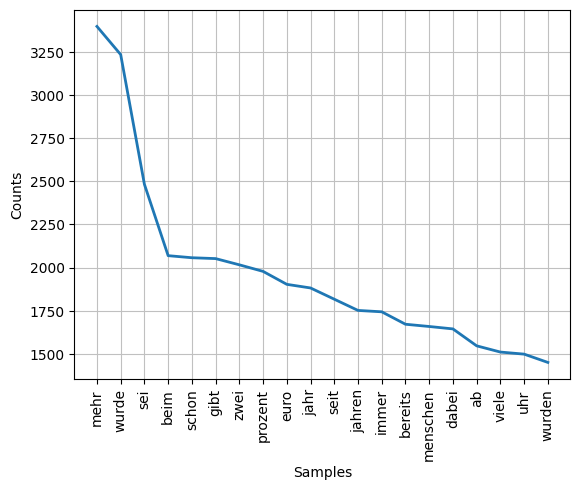

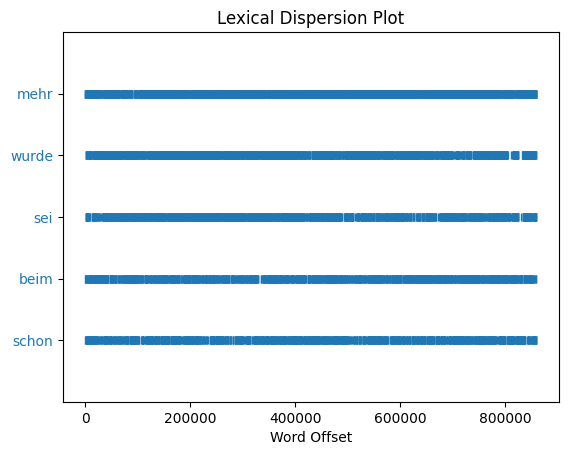

In [15]:
# Task-12: Remove stop-words, then repeat tasks 6 + 7 (20-word frequency plot and 5-word dispersion plot)

from nltk import FreqDist
from nltk.text import Text
from nltk.corpus import stopwords

# A stop-word-free token list
stops          = set(stopwords.words("german"))
clean_words    = [w.lower() for w in reader.words()
                  if w.isalpha() and w.lower() not in stops]

# The 20 most frequent 'clean' words plot
fdist_clean = FreqDist(clean_words)
plot = fdist_clean.plot(20)

# Dispersion plot for the top-5 of those words
top5_clean     = [w for w, _ in fdist_clean.most_common(5)]
text_clean     = Text(clean_words)
text_clean.dispersion_plot(top5_clean)


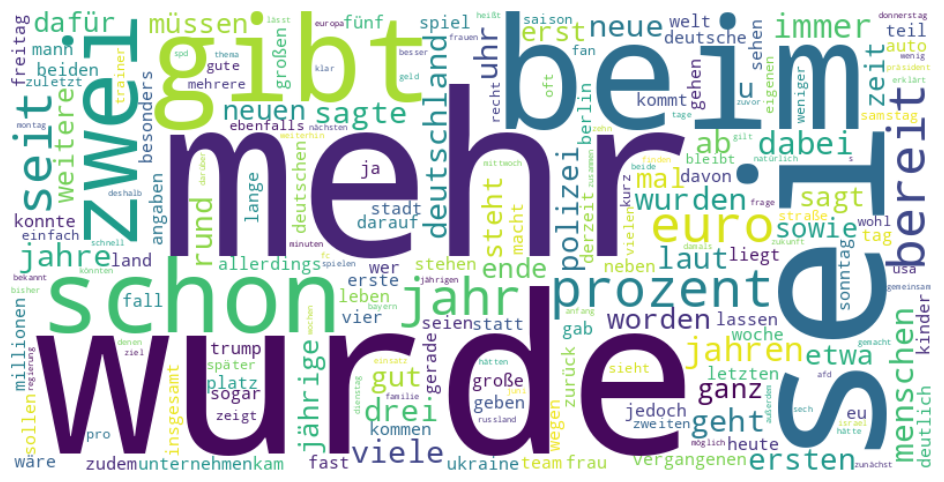

In [16]:
# Task-13: Print a word-cloud of the corpus 'without' any stop-words

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Re-use the stop-word-free list from Task-12
text_blob = " ".join(clean_words)

# Build the word-cloud (used defaults)
wc = WordCloud(width=800, height=400,
               background_color="white",
               collocations=False,
               max_words=200,
               font_path=None)

wc.generate(text_blob)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()
